# Machine Learning Analysis to Predict is_liked 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pred_df = pd.read_csv('desktop/independant_projects/movie_score_predictor/ML_dataset1.csv')

pred_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1894,45,10,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [3]:
#split out the y column and drop the x column 
#split the data into training and testing sets
#scale the features so that date doesn't play an outsized role

Y = pred_df[['is_liked']].copy()

Y = np.ravel(Y)

X = pred_df.drop(columns = ['is_liked'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

X_s = MinMaxScaler().fit(X_train)

X_tr_scale = X_s.transform(X_train)
X_ts_scale = X_s.transform(X_test)


In [4]:
X_tr_scale

array([[0.81746032, 0.08474576, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.78571429, 0.04563233, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61111111, 0.06388527, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96825397, 0.08996089, 0.72727273, ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.07692308, 0.63636364, ..., 0.        , 0.        ,
        0.        ],
       [0.61904762, 0.06127771, 0.27272727, ..., 0.        , 0.        ,
        0.        ]])

In [5]:
X_ts_scale

array([[0.97619048, 0.0821382 , 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       [0.92063492, 0.06127771, 0.63636364, ..., 0.        , 0.        ,
        0.        ],
       [0.79365079, 0.07692308, 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26984127, 0.14341591, 0.90909091, ..., 0.        , 0.        ,
        0.        ],
       [0.8968254 , 0.05736636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94444444, 0.09387223, 0.63636364, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
Y_train

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [7]:
#try a support vector machine model
from sklearn.svm import SVC
from sklearn.metrics import classification_report

movie_preds_svc = SVC(kernel='linear')

movie_preds_svc.fit(X_tr_scale, Y_train)



SVC(kernel='linear')

In [8]:
mov_preds_svc = movie_preds_svc.predict(X_ts_scale)

mov_preds_svc

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
print(classification_report(Y_test, mov_preds_svc))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66     10174
           1       0.69      0.74      0.71     11290

    accuracy                           0.69     21464
   macro avg       0.69      0.69      0.69     21464
weighted avg       0.69      0.69      0.69     21464



These results aren't amazing, but they are a good starting point. The next thing I need to do is compare some different models and see which ones get the best results. I also need to try a model that allows me to see which features are most important. 
I think decision tree or random forest might be able to do those things. 

In [10]:
#now it's time to try decision tree 
from sklearn.tree import DecisionTreeClassifier

#I'm going to start with all default hyperparameters and possibly mess with them later based on the outcome
#in particular, I'm interested in the depth of the tree that I end up with as that seems to be the main hyperparameter that 
#leads to overfitting or underfitting in most cases

d_tree = DecisionTreeClassifier()

d_tree.fit(X_tr_scale, Y_train)


DecisionTreeClassifier()

In [12]:
#lets look at accuracy now

train_acc = d_tree.score(X_tr_scale, Y_train)
test_acc = d_tree.score(X_ts_scale, Y_test)

print(f'Training accuracy:{train_acc}')
print(f'Testing accuracy:{test_acc}')

Training accuracy:0.9782888913046854
Testing accuracy:0.6276090197540067


This large drop in accuracy probably is due to overfitting. 

In [31]:
#try to look at feature importance

imp_list1 =list( d_tree.feature_importances_)

imp_list1

[0.2878121920913814,
 0.27740802893363375,
 0.18464363587296906,
 0.01581418215145594,
 0.006745306749806375,
 0.005609219874170318,
 0.003961458582218299,
 0.005058282665560473,
 0.010046256310095982,
 0.050837316180747084,
 0.003290476455577591,
 0.007699639563889656,
 0.006720117801161637,
 0.00849222149237111,
 0.0037104569017651764,
 0.014301435034002904,
 0.0,
 0.008716468805233269,
 0.008842047643510874,
 0.007246246146584743,
 0.016268247391981343,
 0.00903734435819978,
 7.066877335856377e-05,
 0.02169751581798766,
 0.00222127413951994,
 0.002235159053246471,
 0.00019359766602715514,
 0.00038657143284637376,
 0.01315743709411478,
 0.0007827871228408773,
 0.0019017217106084504,
 0.002850343973400733,
 0.0030307296036789443,
 0.0021275675954868407,
 4.1981629755047626e-05,
 0.004421355186106309,
 0.0006902133003063374,
 0.0019304948943988005]

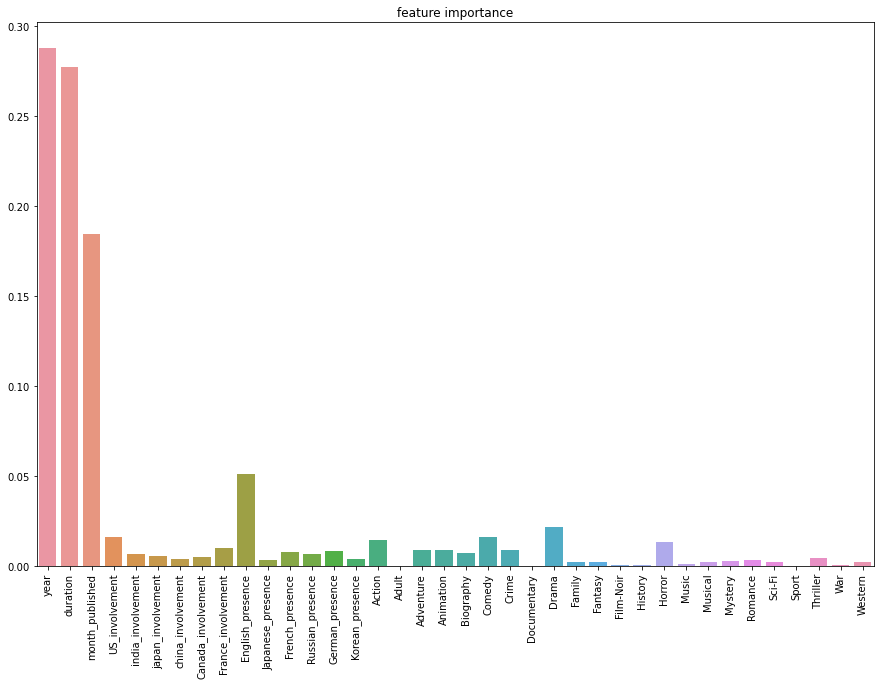

In [42]:
#try a plot to make this easier to see

features = list(X.columns.values)

#set up a dictionary with feature : importance key value pairs
#one of the features was unused, and 

i_dict1 = {}

for i in range(38):
    i_dict1.update({features[i] : imp_list1[i]})

i1_df = pd.DataFrame(i_dict1, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i1_df)
plt.xticks(rotation = 90)

plt.show()


In [46]:
from sklearn import tree


In [60]:
#Write a loop to try some different tree depths

train_scores = []
test_scores = []

for s in range(4, 49, 4):
    iter_tree = DecisionTreeClassifier(max_depth = s)
    iter_tree.fit(X_tr_scale, Y_train)
    i_train_ac = iter_tree.score(X_tr_scale, Y_train)
    i_test_ac = iter_tree.score(X_ts_scale, Y_test)
    train_scores.append(i_train_ac)
    test_scores.append(i_test_ac)

print(train_scores)
print(test_scores)

[0.6735102731748226, 0.707552297681353, 0.7399947197589726, 0.7959186842881769, 0.8588777934804553, 0.9116491435138451, 0.9459707101924182, 0.9657716140454411, 0.9742665900514047, 0.9775589756332407, 0.978118059977326, 0.9782888913046854]
[0.6742452478568767, 0.6974468878121506, 0.691064107342527, 0.6697260529258293, 0.6554230339172568, 0.6389303019008572, 0.6311032426388371, 0.6298453224002982, 0.6277021990309355, 0.6275158404770779, 0.6238818486768543, 0.6251397689153932]


In [61]:
#prepare to plot this data

t_deep = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]

f_dict = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores, 'Test_Accuracy': test_scores}

fit_df = pd.DataFrame(f_dict)

fit_df = fit_df.set_index('Tree_Depth')

fit_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.673510,0.674245
8,0.707552,0.697447
12,0.739995,0.691064
16,0.795919,0.669726
20,0.858878,0.655423
24,0.911649,0.638930
28,0.945971,0.631103
32,0.965772,0.629845
36,0.974267,0.627702


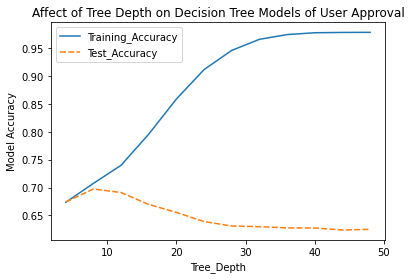

In [62]:
#lineplot in seaborn

sn.lineplot( data = fit_df)
plt.title('Affect of Tree Depth on Decision Tree Models of User Approval')
plt.ylabel('Model Accuracy')
plt.show()

Interestingly the ability of the model to predict the test data diminishes as it fits the training data better. The optimal fitting uses trees with a depth of only 8. This returns results with about the same accuracy as the support vector machine model I did previously. 

In [63]:
#we should hone in on the tree model with a depth of 8 and try to understand how it is working

eight_tree = DecisionTreeClassifier(max_depth = 8)

eight_tree.fit(X_tr_scale, Y_train)

ei_train = eight_tree.score(X_tr_scale, Y_train)

ei_test = eight_tree.score(X_ts_scale, Y_test)

print(f'training accuracy:{ei_train}')
print(f'test accuracy: {ei_test}')


training accuracy:0.707552297681353
test accuracy: 0.697493477450615


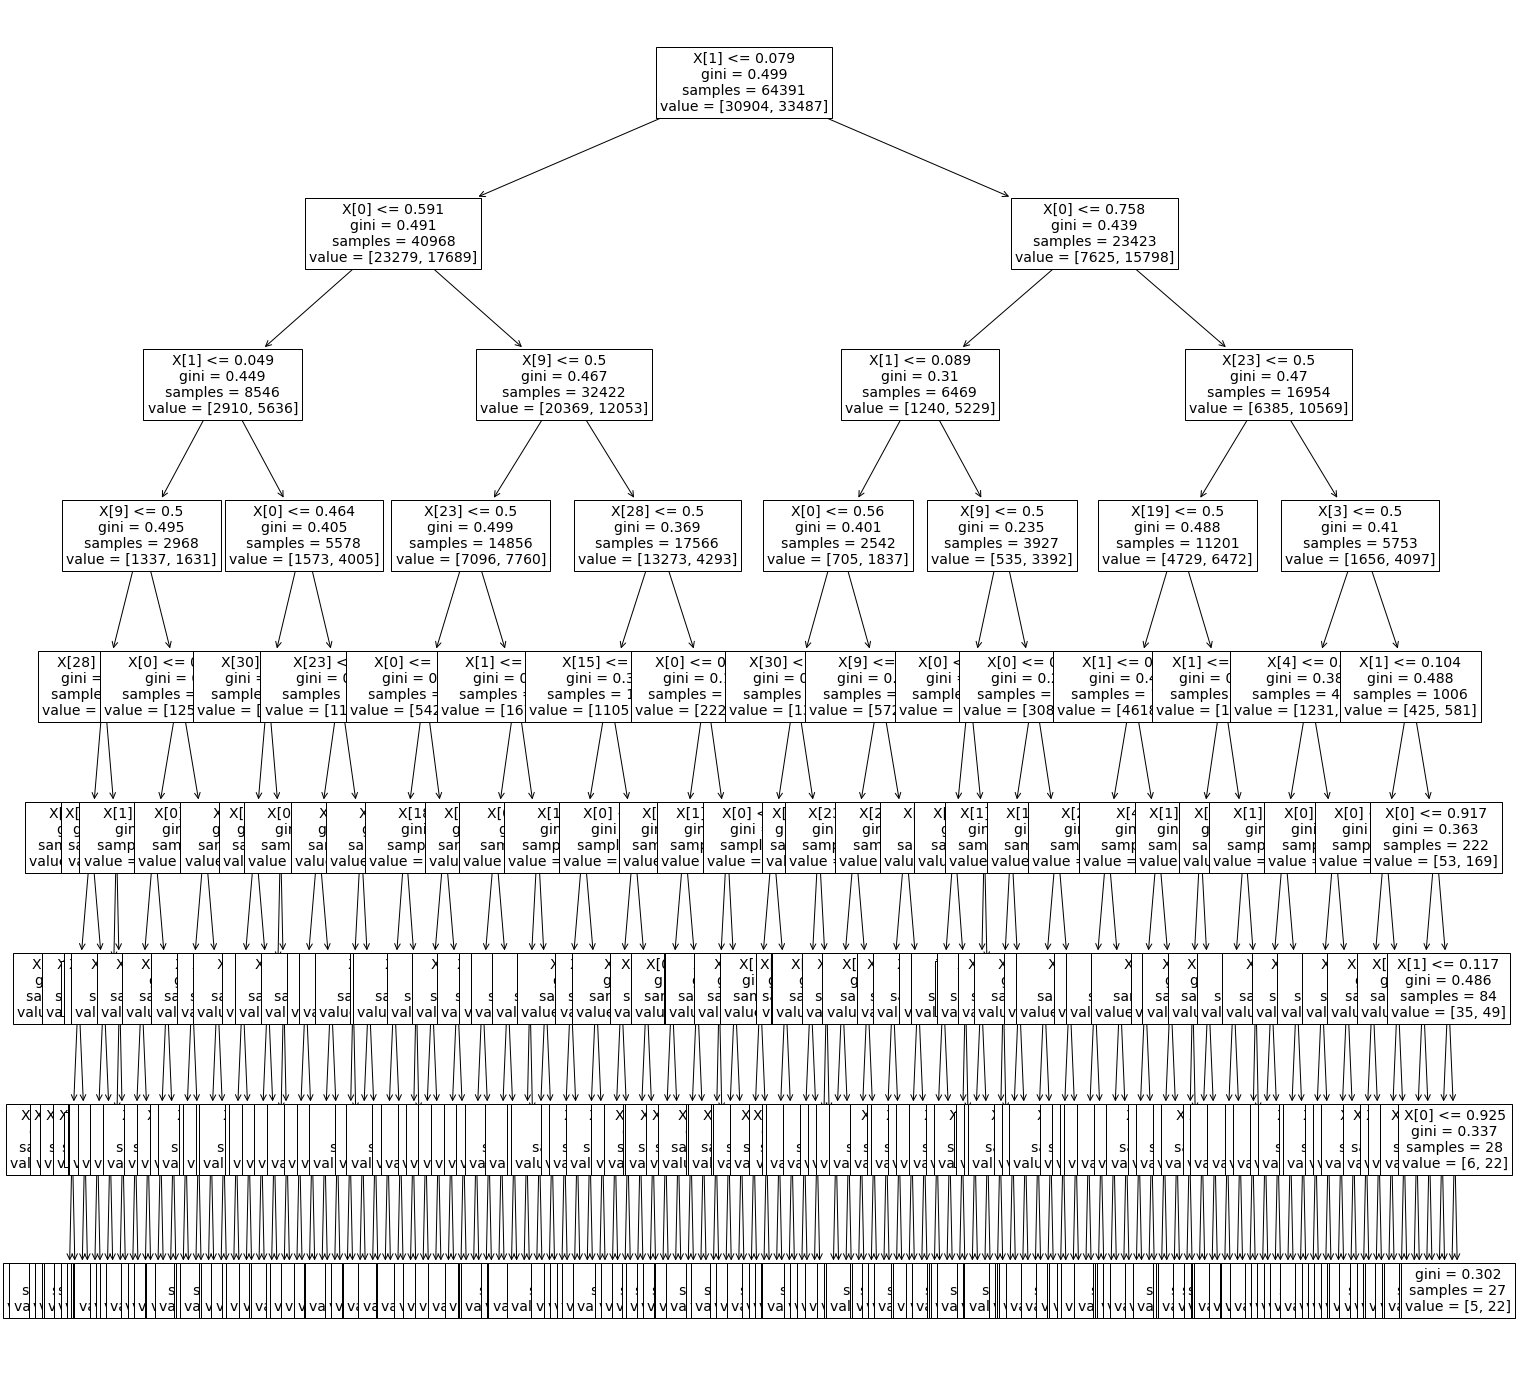

In [70]:
plt.figure(figsize = (25,25))

tree.plot_tree(eight_tree, fontsize = 14)

plt.show()

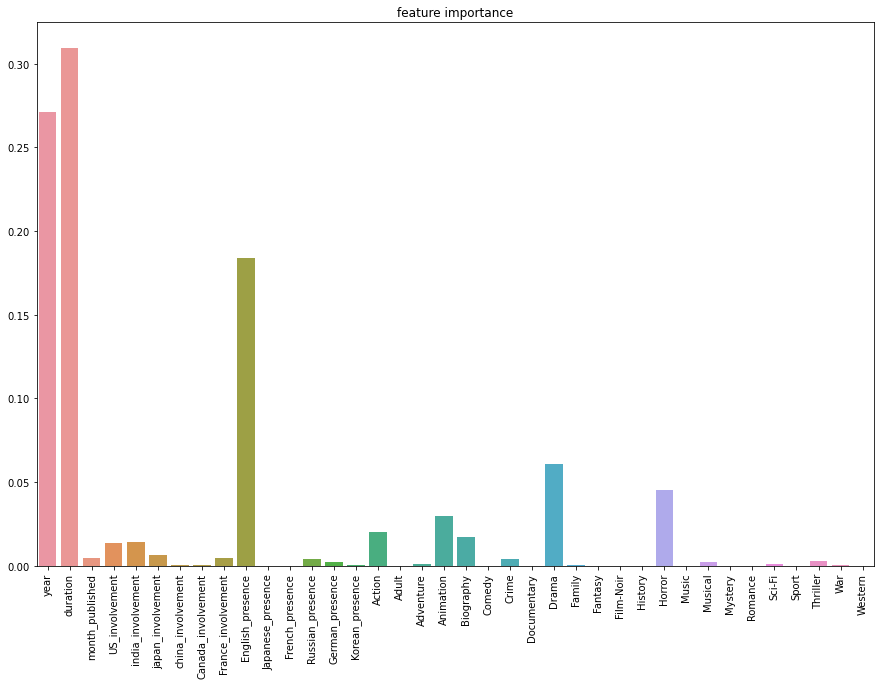

In [72]:
#plot feature importance

i_list_2 = list(eight_tree.feature_importances_)

i_dict2 = {}

for i in range(38):
    i_dict2.update({features[i] : i_list_2[i]})

i2_df = pd.DataFrame(i_dict2, index = [0])

plt.figure(figsize = (15, 10))
plt.title('feature importance')
sn.barplot( data = i2_df)
plt.xticks(rotation = 90)

plt.show()


# Machine Learning Analysis on is_outlier 

In [74]:
pred2_df = pd.read_csv('desktop/independant_projects/movie_score_predictor/ML_dataset2.csv')

pred2_df.head()

,year,duration,month_published,US_involvement,india_involvement,japan_involvement,china_involvement,Canada_involvement,France_involvement,English_presence,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,genre_complexity,UK_involvement,is_outlier
0,1894,45,10,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1906,70,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
2,1911,53,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1912,100,11,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0
4,1911,68,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [75]:
#redo the train test split manipulations for the new set

Y2 = pred2_df[['is_outlier']].copy()

Y2 = np.ravel(Y2)

X2 = pred2_df.drop(columns = ['is_outlier'])

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state = 42)

X2_s = MinMaxScaler().fit(X2_train)

X2_tr_scale = X2_s.transform(X2_train)
X2_ts_scale = X2_s.transform(X2_test)

In [77]:
#repeat the decision tree analysis on tree depth with the new dataset
#Write a loop to try some different tree depths

train_scores2 = []
test_scores2 = []

for s in range(4, 49, 4):
    i2_tree = DecisionTreeClassifier(max_depth = s)
    i2_tree.fit(X2_tr_scale, Y2_train)
    i2_train_ac = i2_tree.score(X2_tr_scale, Y2_train)
    i2_test_ac = i2_tree.score(X2_ts_scale, Y2_test)
    train_scores2.append(i_train_ac)
    test_scores2.append(i_test_ac)

print(train_scores2)
print(test_scores2)


[0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854, 0.9782888913046854]
[0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932, 0.6251397689153932]


In [80]:
f_dict2 = {'Tree_Depth': t_deep, 'Training_Accuracy': train_scores2, 'Test_Accuracy': test_scores2}

fit2_df = pd.DataFrame(f_dict2)

fit2_df = fit2_df.set_index('Tree_Depth')

fit2_df

,Training_Accuracy,Test_Accuracy
Tree_Depth,,
4,0.978289,0.62514
8,0.978289,0.62514
12,0.978289,0.62514
16,0.978289,0.62514
20,0.978289,0.62514
24,0.978289,0.62514
28,0.978289,0.62514
32,0.978289,0.62514
36,0.978289,0.62514


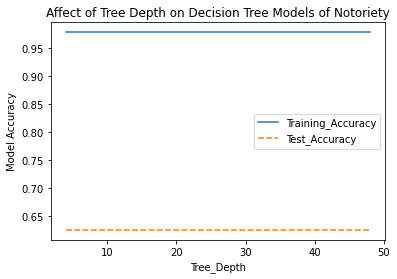

In [82]:
sn.lineplot( data = fit2_df)
plt.title('Affect of Tree Depth on Decision Tree Models of Notoriety')
plt.ylabel('Model Accuracy')
plt.show()